In [4]:
import pandas as pd
# Load processed data
X_train = pd.read_csv("../data/X_train.csv")
y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_test = pd.read_csv("../data/y_test.csv")

In [5]:
import joblib

# Load trained models
log_reg = joblib.load("../models/logistic_regression.pkl")
tree_clf = joblib.load("../models/decision_tree.pkl")
rf_clf = joblib.load("../models/random_forest.pkl")
xgb_clf = joblib.load("../models/xgboost.pkl")

print("✅ Models loaded successfully!")


✅ Models loaded successfully!


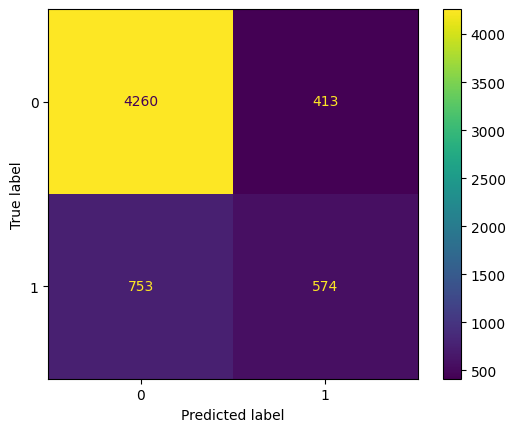

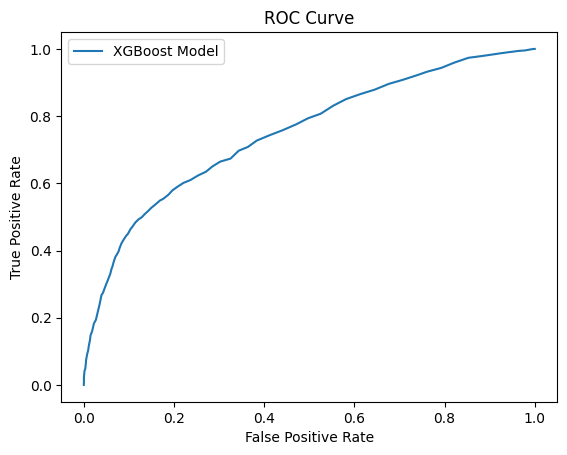

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

# Choose the best model (Example: XGBoost)
best_model = rf_clf  

# Predictions
y_pred_best = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="XGBoost Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import classification_report

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": tree_clf,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:\n")
    print(classification_report(y_test, y_pred))



Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.85      0.74      0.80      4673
           1       0.38      0.55      0.45      1327

    accuracy                           0.70      6000
   macro avg       0.62      0.65      0.62      6000
weighted avg       0.75      0.70      0.72      6000


Decision Tree Performance:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4673
           1       0.54      0.46      0.49      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000


Random Forest Performance:

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.58      0.43      0.50      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.67  

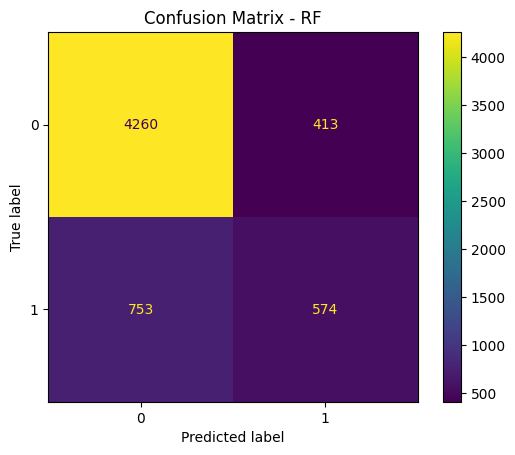

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using XGBoost
y_pred_rf = rf_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - RF")
plt.show()


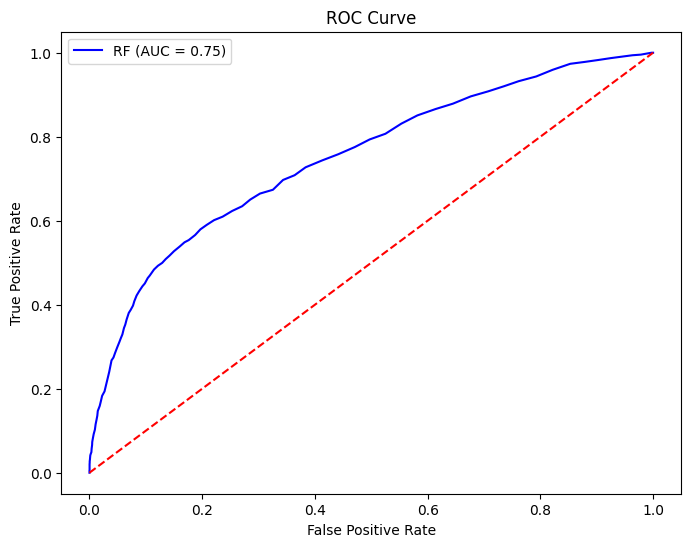

In [11]:
from sklearn.metrics import roc_curve, auc

# Get probabilities for positive class (default = 1)
y_probs_rf = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"RF (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "r--")  # Random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
